In [33]:
import numpy as np
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self, shape=[4,4]):
        self.shape = shape
        self.n_states = np.prod(shape)
        self.n_actions = 4
        self.action_space = np.arange(self.n_actions)
        self.state = None
        self.reset()

    def step(self, action):
        if action == 0:  # Up
            if self.state >= self.shape[0]:
                self.state -= self.shape[0]
        elif action == 1:  # Down
            if self.state < self.shape[0] * (self.shape[1]-1):
                self.state += self.shape[0]
        elif action == 2:  # Right
            if self.state % self.shape[1] < self.shape[1] - 1:
                self.state += 1
        elif action == 3:  # Left
            if self.state % self.shape[1] > 0:
                self.state -= 1

        done = self.state == self.n_states - 1
        if done:
            reward = 0
        else:
            reward = -1

        return self.state, reward, done, {}

    def reset(self):
        self.state = 0
        return self.state

    def render(self):
        # create a blank grid world
        grid_world = np.zeros(self.shape)

        # mark the current state
        row, col = self.state // self.shape[1], self.state % self.shape[1]
        grid_world[row, col] = 1

        # plot the grid world
        plt.imshow(grid_world, cmap='coolwarm')
        plt.show()



Step: 1
State: 1
Action: 2
Reward: -1


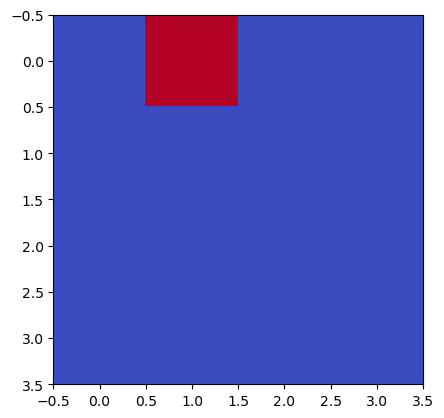

Step: 2
State: 1
Action: 0
Reward: -1


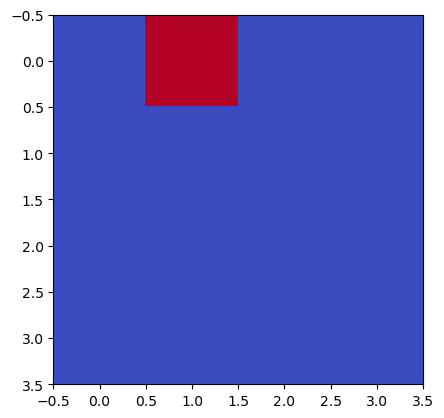

Step: 3
State: 5
Action: 1
Reward: -1


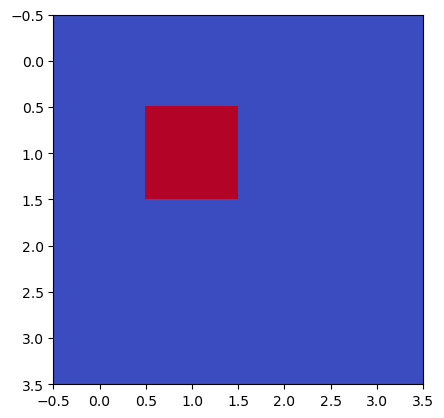

Step: 4
State: 9
Action: 1
Reward: -1


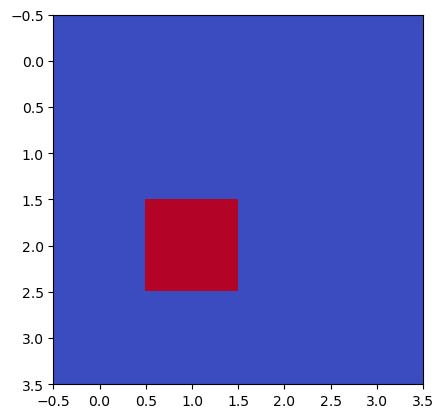

Step: 5
State: 5
Action: 0
Reward: -1


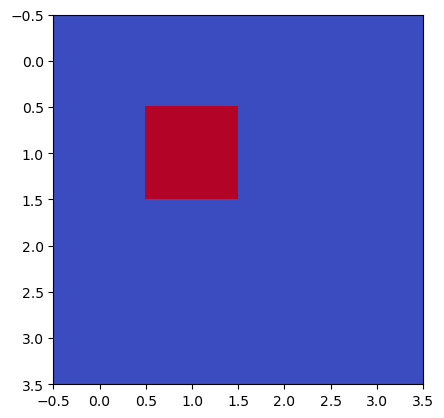

Step: 6
State: 1
Action: 0
Reward: -1


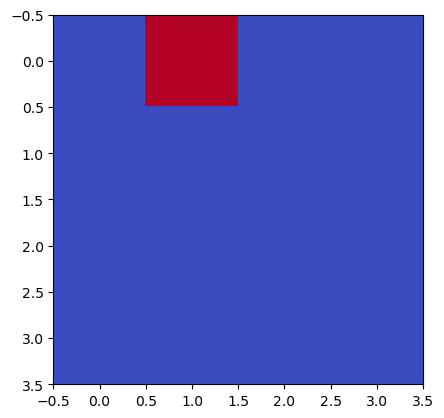

Step: 7
State: 2
Action: 2
Reward: -1


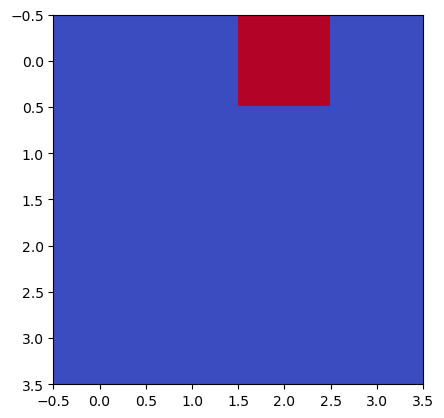

Step: 8
State: 2
Action: 0
Reward: -1


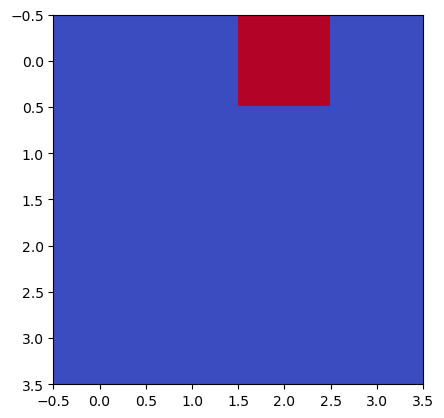

Step: 9
State: 6
Action: 1
Reward: -1


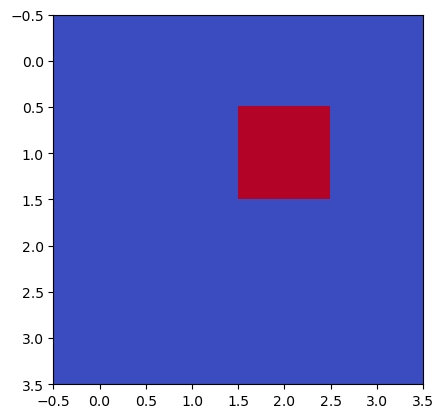

Step: 10
State: 10
Action: 1
Reward: -1


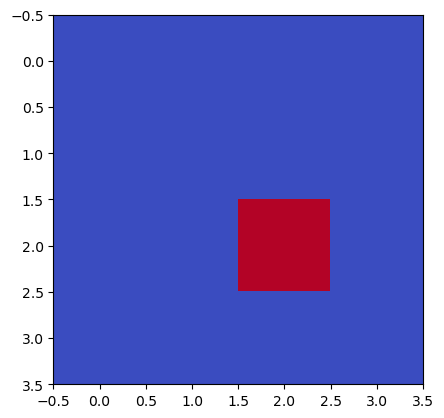

Step: 11
State: 11
Action: 2
Reward: -1


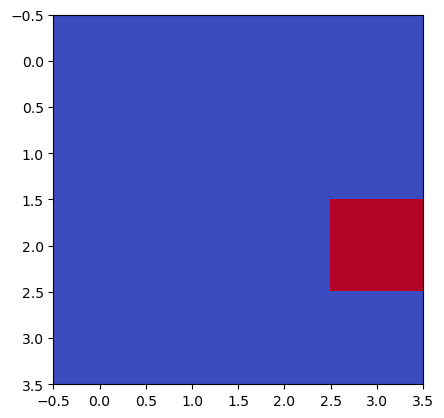

In [34]:
import numpy as np

# create the environment
env = GridWorld()

# run the random agent for 11 timesteps
for i in range(11):
    action = np.random.choice(env.action_space)
    state, reward, done, _ = env.step(action)
    print("Step:", i+1)
    print("State:", state)
    print("Action:", action)
    print("Reward:", reward)
    env.render()
    if done:
        break
